In [4]:
# Abaikan kode berikut
from IPython.display import Image

# Chapter 1 - Membaca
Sebuah citra (Gambar/Image) tidak lebih dari sebuah tabel dimana tiap sel di tabel tersebut
merepresentasikan tingkat kecerahan tertentu.

Misal sebuah citra 8 bit (Nilai angka antara 0 hingga 255), dimana 0 adalah hitam dan 255 adalah putih dapat ditulis di Excel sebagai tabel seperti berikut

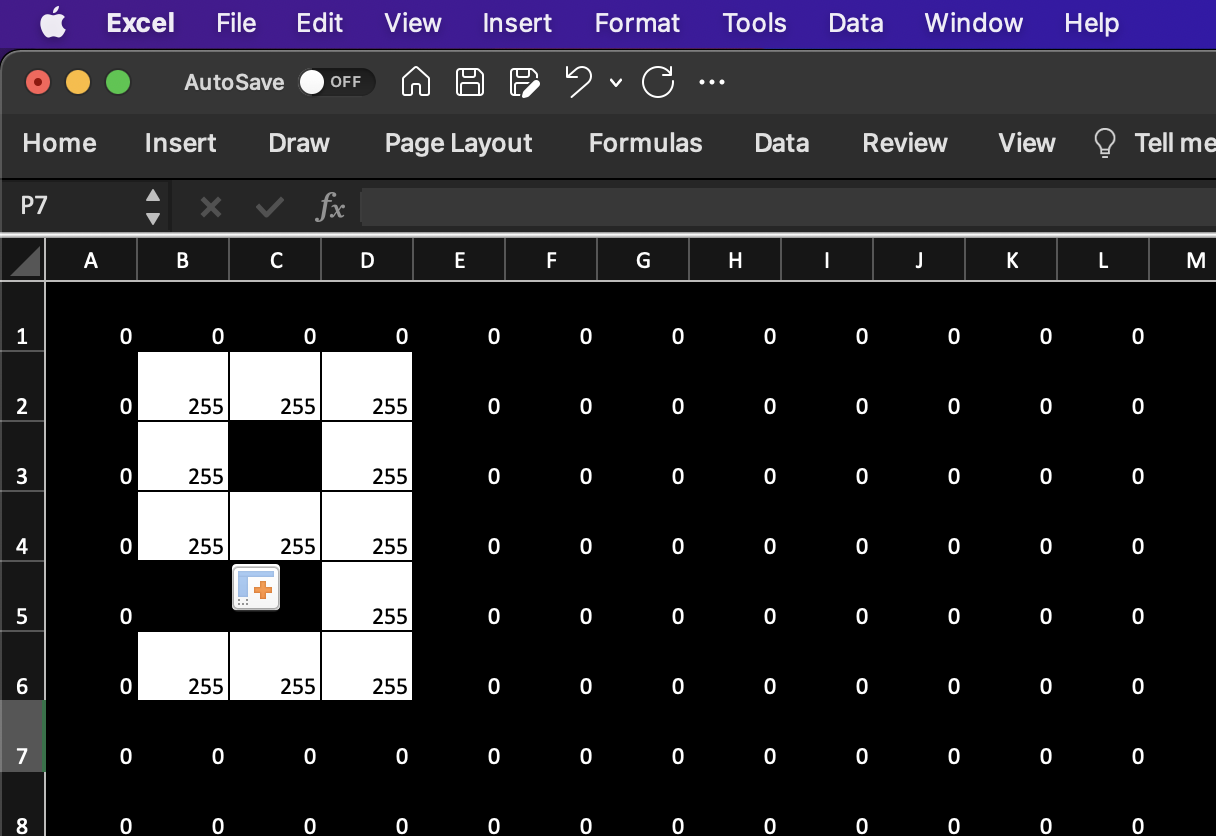

In [8]:
# Abaikan kode berikut
Image("assets/table_excel_citra.png")

Citra diatas adalah contoh citra Grayscale, dimana setiap piksel dapat memiliki nilai antara 0 hingga 255.

Contoh citra lain adalah citra RGB, dimana setiap piksel terdiri dari 3 angka, dimana masing-masing angkat merepresentasikan nilai R, G dan B

Citra lain adalah citra biner (Hitam Putih, tanpa nilai abu) yang setiap piksel dapat direpresentasikan oleh angka 0 atau 1

#### Video
Video adalah kumpulan gambar, bayangkan sebuah slideshow yang terdiri dari banyak gambar, dimana masing-masing gambar ditampilkan selama beberapa milisecond lalu digantikan gambar selanjutnya

Gambar yang dimaksudkan dalam konteks video biasa disebut Frame, dan jumlah gambar yang muncul ke manusia setiap detik biasa disebut FPS (Frame per second)

Sebuah video biasanya memiliki nilai FPS terendah 24FPS untuk menghasilkan video yang smooth

Setiap frame dapat dianggap sebagai gambar terpisah, dan pemrosesan Computer Vision dapat dilakukan di masing-masing frame tersendiri. Misal untuk video 24 FPS, maka pemrosesan perlu dilakukan 24 kali per detik.

### Webcam
Video yang berasal dari webcam tidak lebih dari sebuah video, perbedaannya adalah kita tidak tahu kapan video tersebut akan berakhir. Frame rate dari sebuah webcam juga tidak dapat dipastikan karena dipengaruhi oleh misalnya 'shutter speed' dan cahaya di ruangan

Mengingat dalam aplikasi penginderaan citra, baik citra, video maupaun hasil webcam yang akan kita proses adalah perframe, kita tidak peduli kita tidak tahu kapan video akan berakhir

## Chapter 1.1 - Membaca Gambar

Library yang biasa digunakan dalam aplikasi computer vision adalah OpenCV (Open Computer Vision)

OpenCV di python dapat diinstall menggunakan library 'opencv-python' dan dipanggil mempergunakan symbol 'cv2'

In [4]:
!pip install opencv-python
import cv2

Misalkan untuk membaca sebuah citra JPG dari file, maka perlu diketahui lokasi file gambar di penyimpanan, lalu lakukan pembacaan mempergunakan fungsi `imread` (Image Read) dan simpan ke sebuah variabel, dalam hal ini `img`

In [5]:
path_gambar = "./sample/robot_ball.jpg"
img = cv2.imread(path_gambar)

"Sebuah citra tidak lebih dari sebuah tabel", masih ingat kalimat ini?

Hasil menjalankan kode diatas akan meload sebuah tabel 3 dimensi (Dimensi pertama adalah baris kebawah, kedua adalah width ke kanan, dan dimensi ketiga adalah warna yang dapat dianggap kebelakang)

In [6]:
img # Isi dari variabel img adalah array 3 dimensi, dimana setiap sel direpresentasikan 3 angka

array([[[207, 242, 252],
        [207, 242, 252],
        [206, 242, 252],
        ...,
        [195, 177, 194],
        [193, 174, 191],
        [190, 171, 188]],

       [[207, 241, 254],
        [207, 241, 254],
        [206, 241, 254],
        ...,
        [193, 175, 192],
        [191, 172, 189],
        [189, 170, 187]],

       [[206, 241, 255],
        [205, 240, 254],
        [204, 239, 253],
        ...,
        [191, 174, 188],
        [189, 170, 185],
        [187, 168, 183]],

       ...,

       [[239, 250, 254],
        [239, 251, 255],
        [240, 253, 255],
        ...,
        [ 45,  35,  51],
        [ 42,  33,  53],
        [ 41,  32,  53]],

       [[239, 251, 255],
        [240, 252, 255],
        [241, 254, 255],
        ...,
        [ 44,  35,  48],
        [ 41,  34,  49],
        [ 42,  34,  51]],

       [[239, 251, 255],
        [240, 252, 255],
        [239, 254, 255],
        ...,
        [ 40,  32,  43],
        [ 38,  31,  46],
        [ 39,  32,  47]]

Meload gambar kedalam memori tidak cukup berguna karena kita perlu melihat isinya, ada beberapa cara menampilkan isi dari sebuah gambar, berikut adalah cara menampilkan menggunakan library `opencv` secara langsung

In [7]:
cv2.imshow("Raw Gambar", img)
cv2.waitKey()
cv2.destroyWindow("Raw Gambar")

Menjalankan kode diatas akan menampilkan `window` seperti screenshot berikut ini

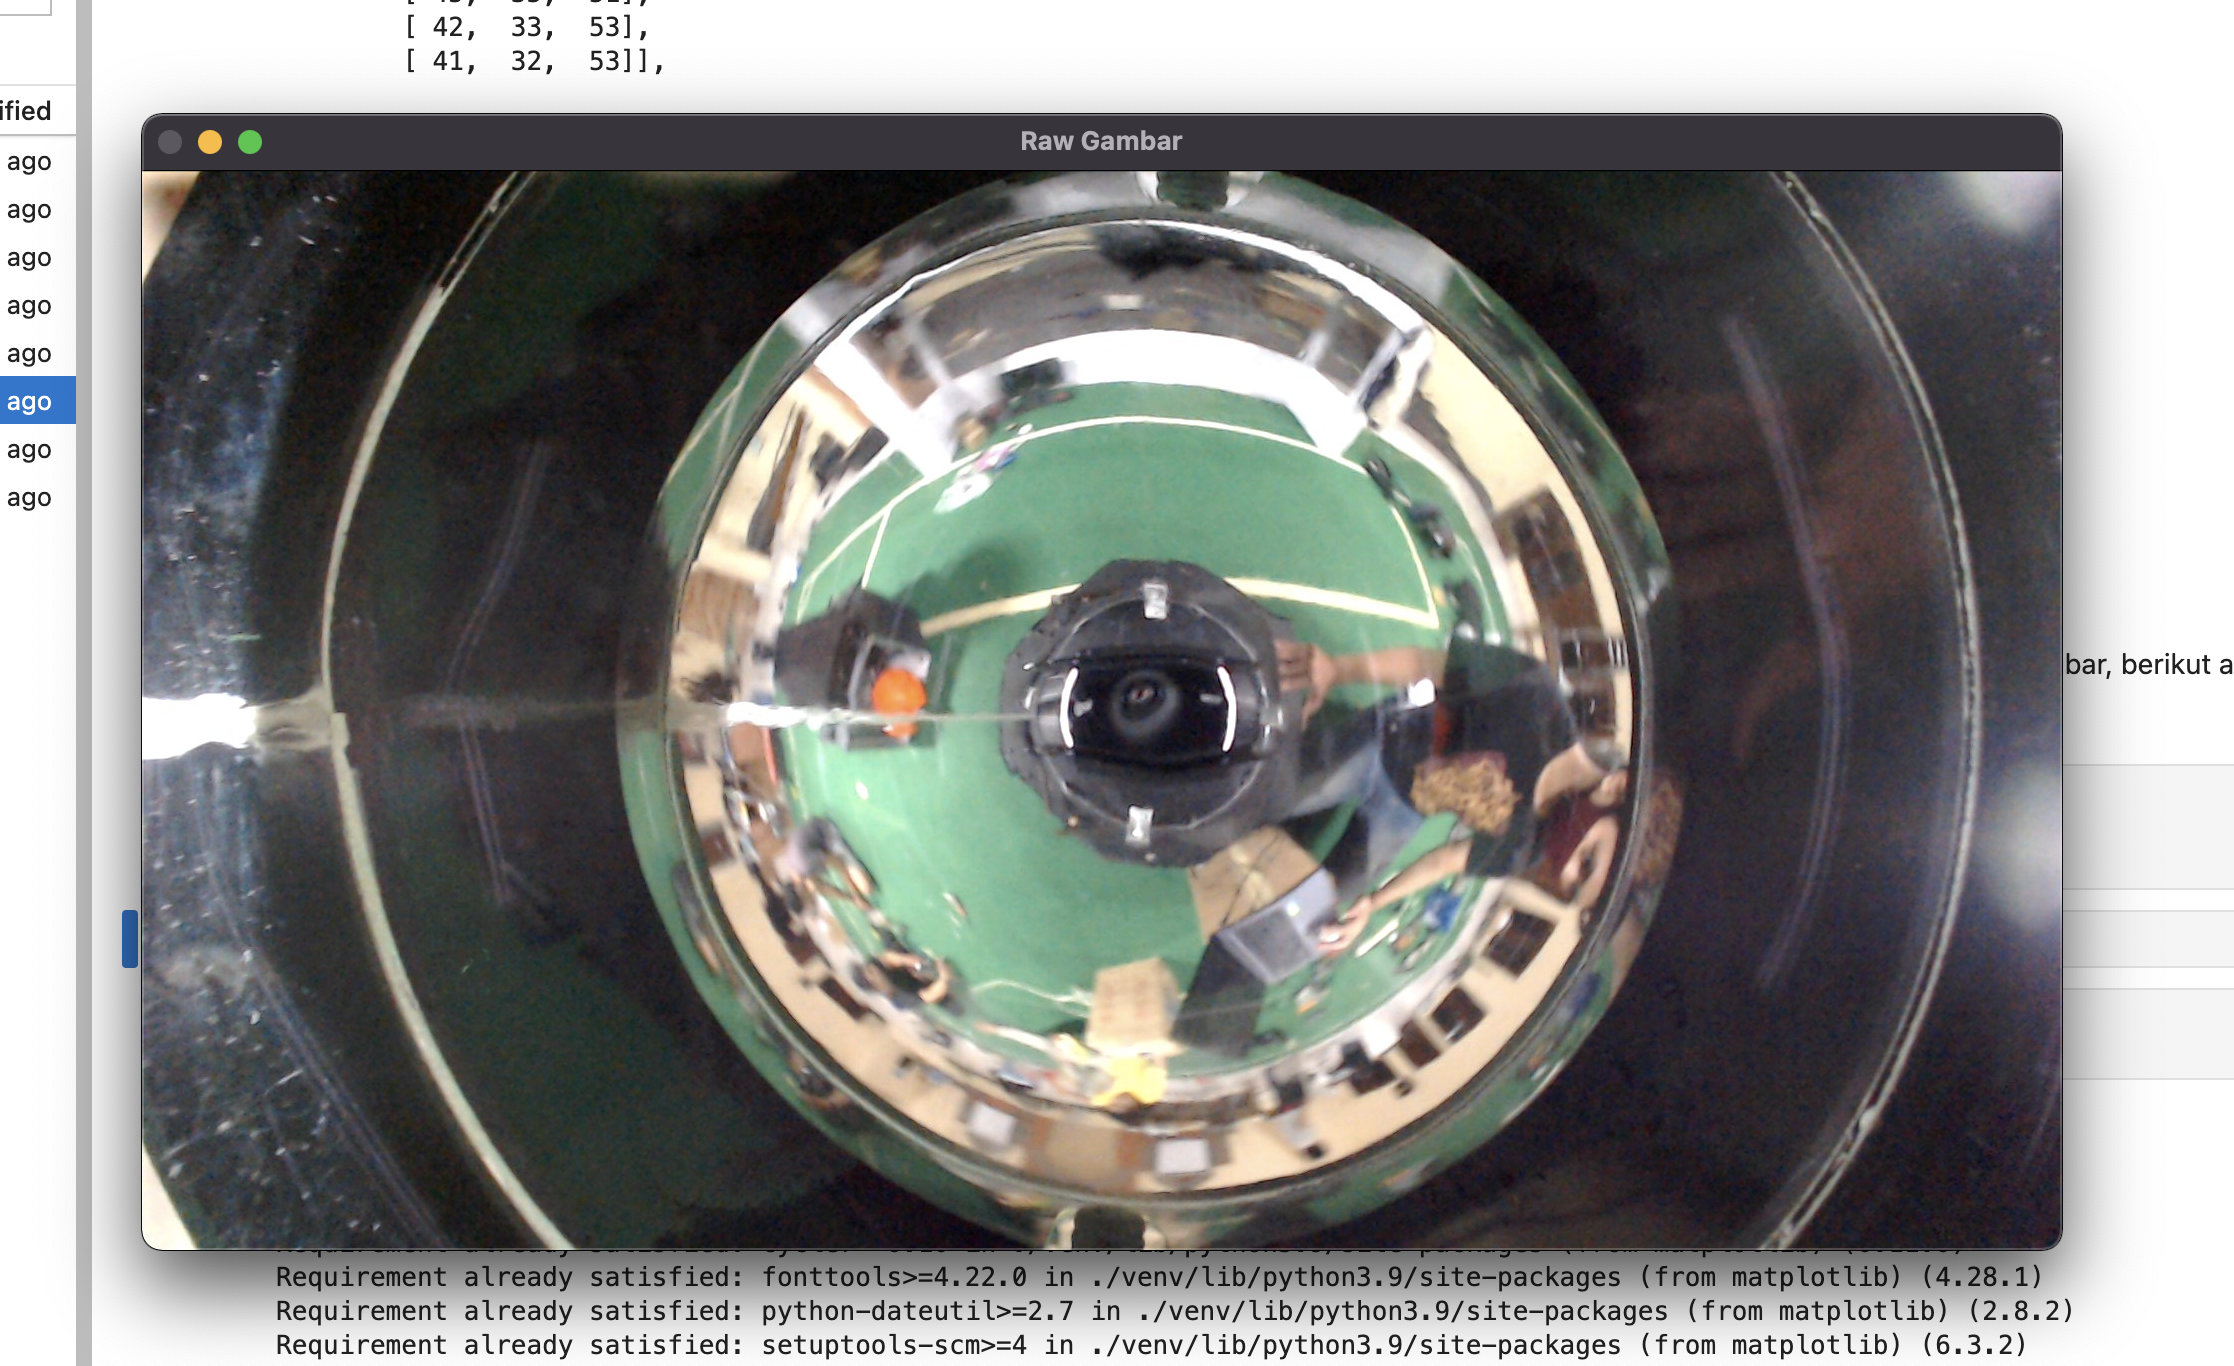

In [9]:
# Abaikan kode berikut
Image("assets/showing_image.png")

Fungsi diatas akan menampilkan gambar kedalam sebuah `window` baru, untuk memudahkan pembuatan materi, gambar juga akan ditampilkan langsung mempergunakan matplotlib, menampilkan gambar langsung ke halaman ini tanpa membuka window baru

Berikut adalah library yang digunakan

In [6]:
!pip install matplotlib
import matplotlib.pyplot as plt

Dan untuk menampilkan gambarnya langsung di halaman ini dapat dilakukan dengan mempergunakan fungsi berikut ini, dan mempass gambar dari `opencv` tadi

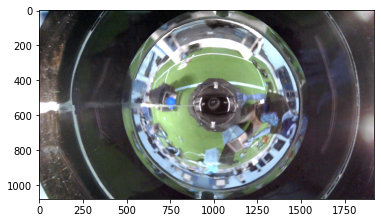

In [7]:
plt.imshow(img)

## Chapter 1.2 - Membaca Video

Membaca dari sebuah video agak sedikit lebih rumit dari membaca gambar karena sebuah video terdiri dari banyak gambar, kita perlu tahu di frame mana saat ini yang sedang ditampilkan, frame mana yang sudah ditampilkan, dan frame mana yang akan ditampilkan (Bayangkan kita membuka video, kita perlu tahu detik berapa yang sedang tampil saat ini untuk tahu detik mana yang perlu ditampilkan selanjutnya)

Proses itu disederhanakan dengan bantuan sebuah `VideoCapture` seperti berikut

In [4]:
import cv2
import matplotlib.pyplot as plt

Inisiasikan sebuah variabel yang akan menyimpan frame mana yang sedang tampil saat ini dan beri nama variabel tadi `vcap` (Video Capture), dalam contoh ini video diambil dari sebuah file video

In [5]:
path_video = "./sample/vid.mp4"
vcap = cv2.VideoCapture(path_video)

Sifat dari `VideoCapture` adalah "stateful", dia menyimpan suatu state didalamnya yaitu 'frame saat ini'

Untuk mengambil sebuah frame dari sebuah VideoCapture dapat dilakukan dengan fungsi `read()`, fungsi ini akan memajukan frame saat ini menuju frame setelah saat ini, dan me`return` nya.

Perhatikan bahwa VideoCapture mereturn 2 nilai, yaitu `ret` dan `frame` itu sendiri

`ret` adalah sebuah penanda apakah frame selanjutnya berhasil di load, apabila bernilai `True` berarti frame selanjutnya berhasil diload, jika `False` berarti frame selanjutnya gagal di load, salah satu penyebabnya mungkin adalah kita sudah mencapai akhir dari video sehingga tak ada frame lagi yang bisa diload

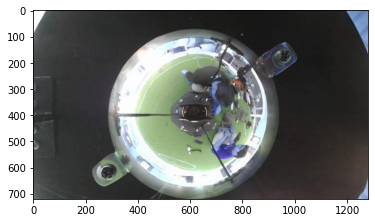

In [6]:
ok, frame1 = vcap.read()
plt.imshow(frame1)

Perhatikan bahwa kita sudah memanggil `read()` satu kali dan akan memajukan pointer frame menuju 'frame 1', apabila kita memanggil fungsi `read()` lagi maka pointer ini akan menuju frame selanjutnya sehingga akan mereturn `frame 3` dan seterusnya seperti berikut

* Dalam contoh video, perbedaan antar frame sangat kecil sehingga cukup sulit untuk dibedakan

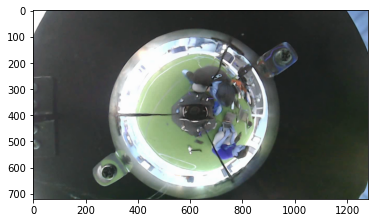

In [7]:
ok, frame2 = vcap.read()
plt.imshow(frame2)

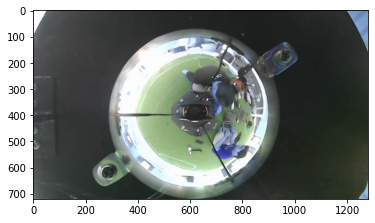

In [8]:
ok, frame3 = vcap.read()
plt.imshow(frame3)

Namun membaca frame satu persatu seperti diatas tidaklah praktikal, kita akan membaca semua frame video dalam perulangan seperti berikut
Arti kode dibawah adalah lakukan perulangan secara terus menerus, baca frame selanjutnya dari video, tampilkan ke window, cek apakah tombol 'q' di keyboard di tekan, jika iya hentikan perulangan, jika tidak lanjutkan menuju iterasi selanjutnya

* Perhatikan bahwa kita tidak mempergunakan variabel `ret` (Yang kita berinama `ok` dalam hal ini), yang berarti kita tidak meng'handle' ketika kita sudah mencapai frame terakhir. Apa yang akan terjadi? Aplikasi akan berjalan selama ada frame yang bisa di load, dan ketika frame terakhir sudah terload, pemanggilan fungsi `read()` selanjutnya akan menyebabkan aplikasi `crash`

In [11]:
# Baca semua frame dalam video sampai habis
while True:
    ok, frame = vcap.read()
    cv2.imshow("Frame VideoX", frame)
    if cv2.waitKey() == ord('q'):
        break

## Chapter 1.3 Membaca Webcam

Membaca sebuah webcam tidak berbeda dari membaca sebuah video, perbedaan utama terletak pada asal frame

Asal frame sebuah video adalah file video itu sendiri, sedangkan untuk webcam kita perlu webcam mana yang akan menghasilkan gambar

Bisa dibayangkan sebuah laptop dapat memiliki lebih dari 1 webcam (Misal 1 webcam builtin dan 1 webcam eksternal), `opencv` akan memberikan id untuk setiap device dimulai dari 0 untuk kamera pertama, 1 untuk kamera kedua dst. Karena webcam biasanya adalah kamera pertama yang di load oleh laptop kita, maka webcam akan memiliki id 0

Untuk membaca webcam kita masih mempergunakan `VideoCapture`, namun parameter yang akan dikirim bukanlah lokasi sebuah file video, tapi id dari kamera

Kode berikut akan membaca frame dari webcam dengan id 0, yaitu kamera built in

* Perhatikan bahwa id dari camera tidak terstandarisasi, misal jika menginstal virtual kamera OBS, tidak jarang id 0 akan diambil oleh OBS dan webcam laptop akan memiliki id 1. Pencarian id dilakukan secara manual.

In [10]:
webcap = cv2.VideoCapture(0)
while True:
    ok, frame = webcap.read()
    cv2.imshow("Frame VideoX", frame)
    if cv2.waitKey() == ord('q'):
        break